In [1]:
from Binaries import *

AllEvents = EventGenerator("all", real_background = False, split = 1)

In [2]:
all_energies = []

for batch in AllEvents:
    for shower in batch:
        all_energies.append(shower.Energy)

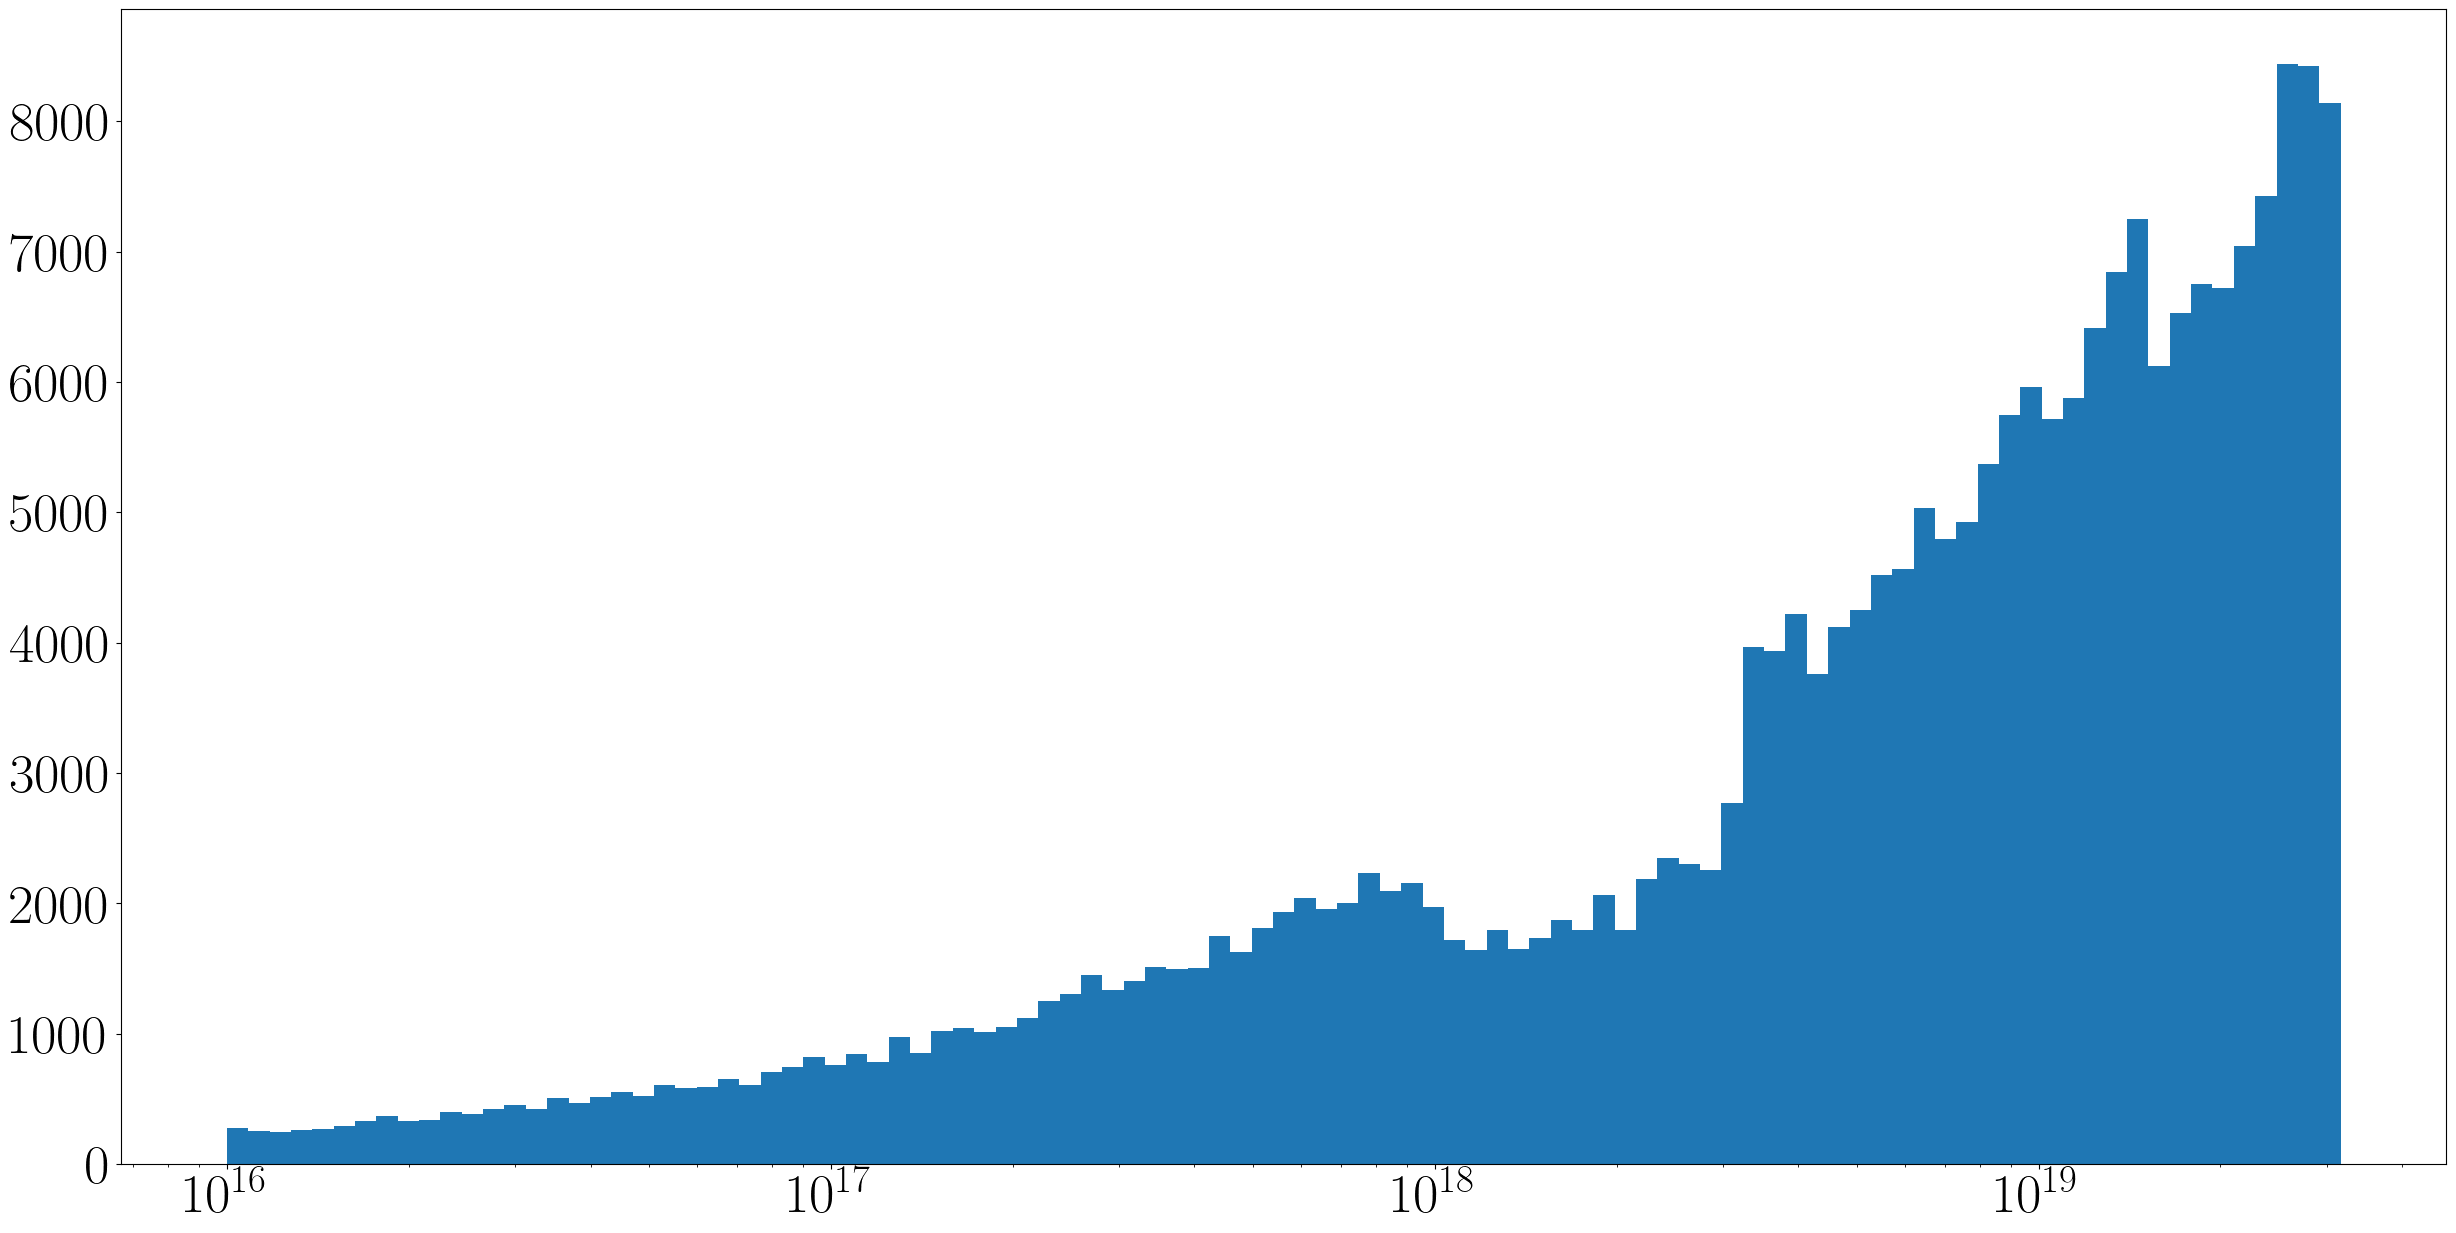

In [6]:
e_bins = np.geomspace(10**16, 10**19.5, 100)
n, bins, batches = plt.hist(all_energies, bins = e_bins)

plt.xscale("log")

In [8]:
print(n)

print((0.5 * (bins[:1] + bins[:-1]))[np.argmax(n)])

[ 273.  256.  245.  258.  271.  295.  328.  369.  332.  341.  399.  386.
  420.  457.  425.  506.  466.  514.  550.  526.  610.  587.  593.  653.
  608.  705.  745.  824.  758.  841.  783.  973.  855. 1019. 1045. 1011.
 1053. 1124. 1251. 1303. 1453. 1335. 1408. 1511. 1495. 1508. 1750. 1628.
 1814. 1931. 2043. 1954. 2005. 2232. 2092. 2155. 1973. 1718. 1641. 1795.
 1653. 1735. 1875. 1795. 2063. 1795. 2185. 2345. 2305. 2257. 2767. 3970.
 3938. 4221. 3758. 4120. 4249. 4523. 4564. 5030. 4797. 4928. 5370. 5745.
 5959. 5719. 5877. 6411. 6847. 7249. 6121. 6529. 6750. 6723. 7044. 7430.
 8439. 8425. 8142.]
1.2390381779958569e+19


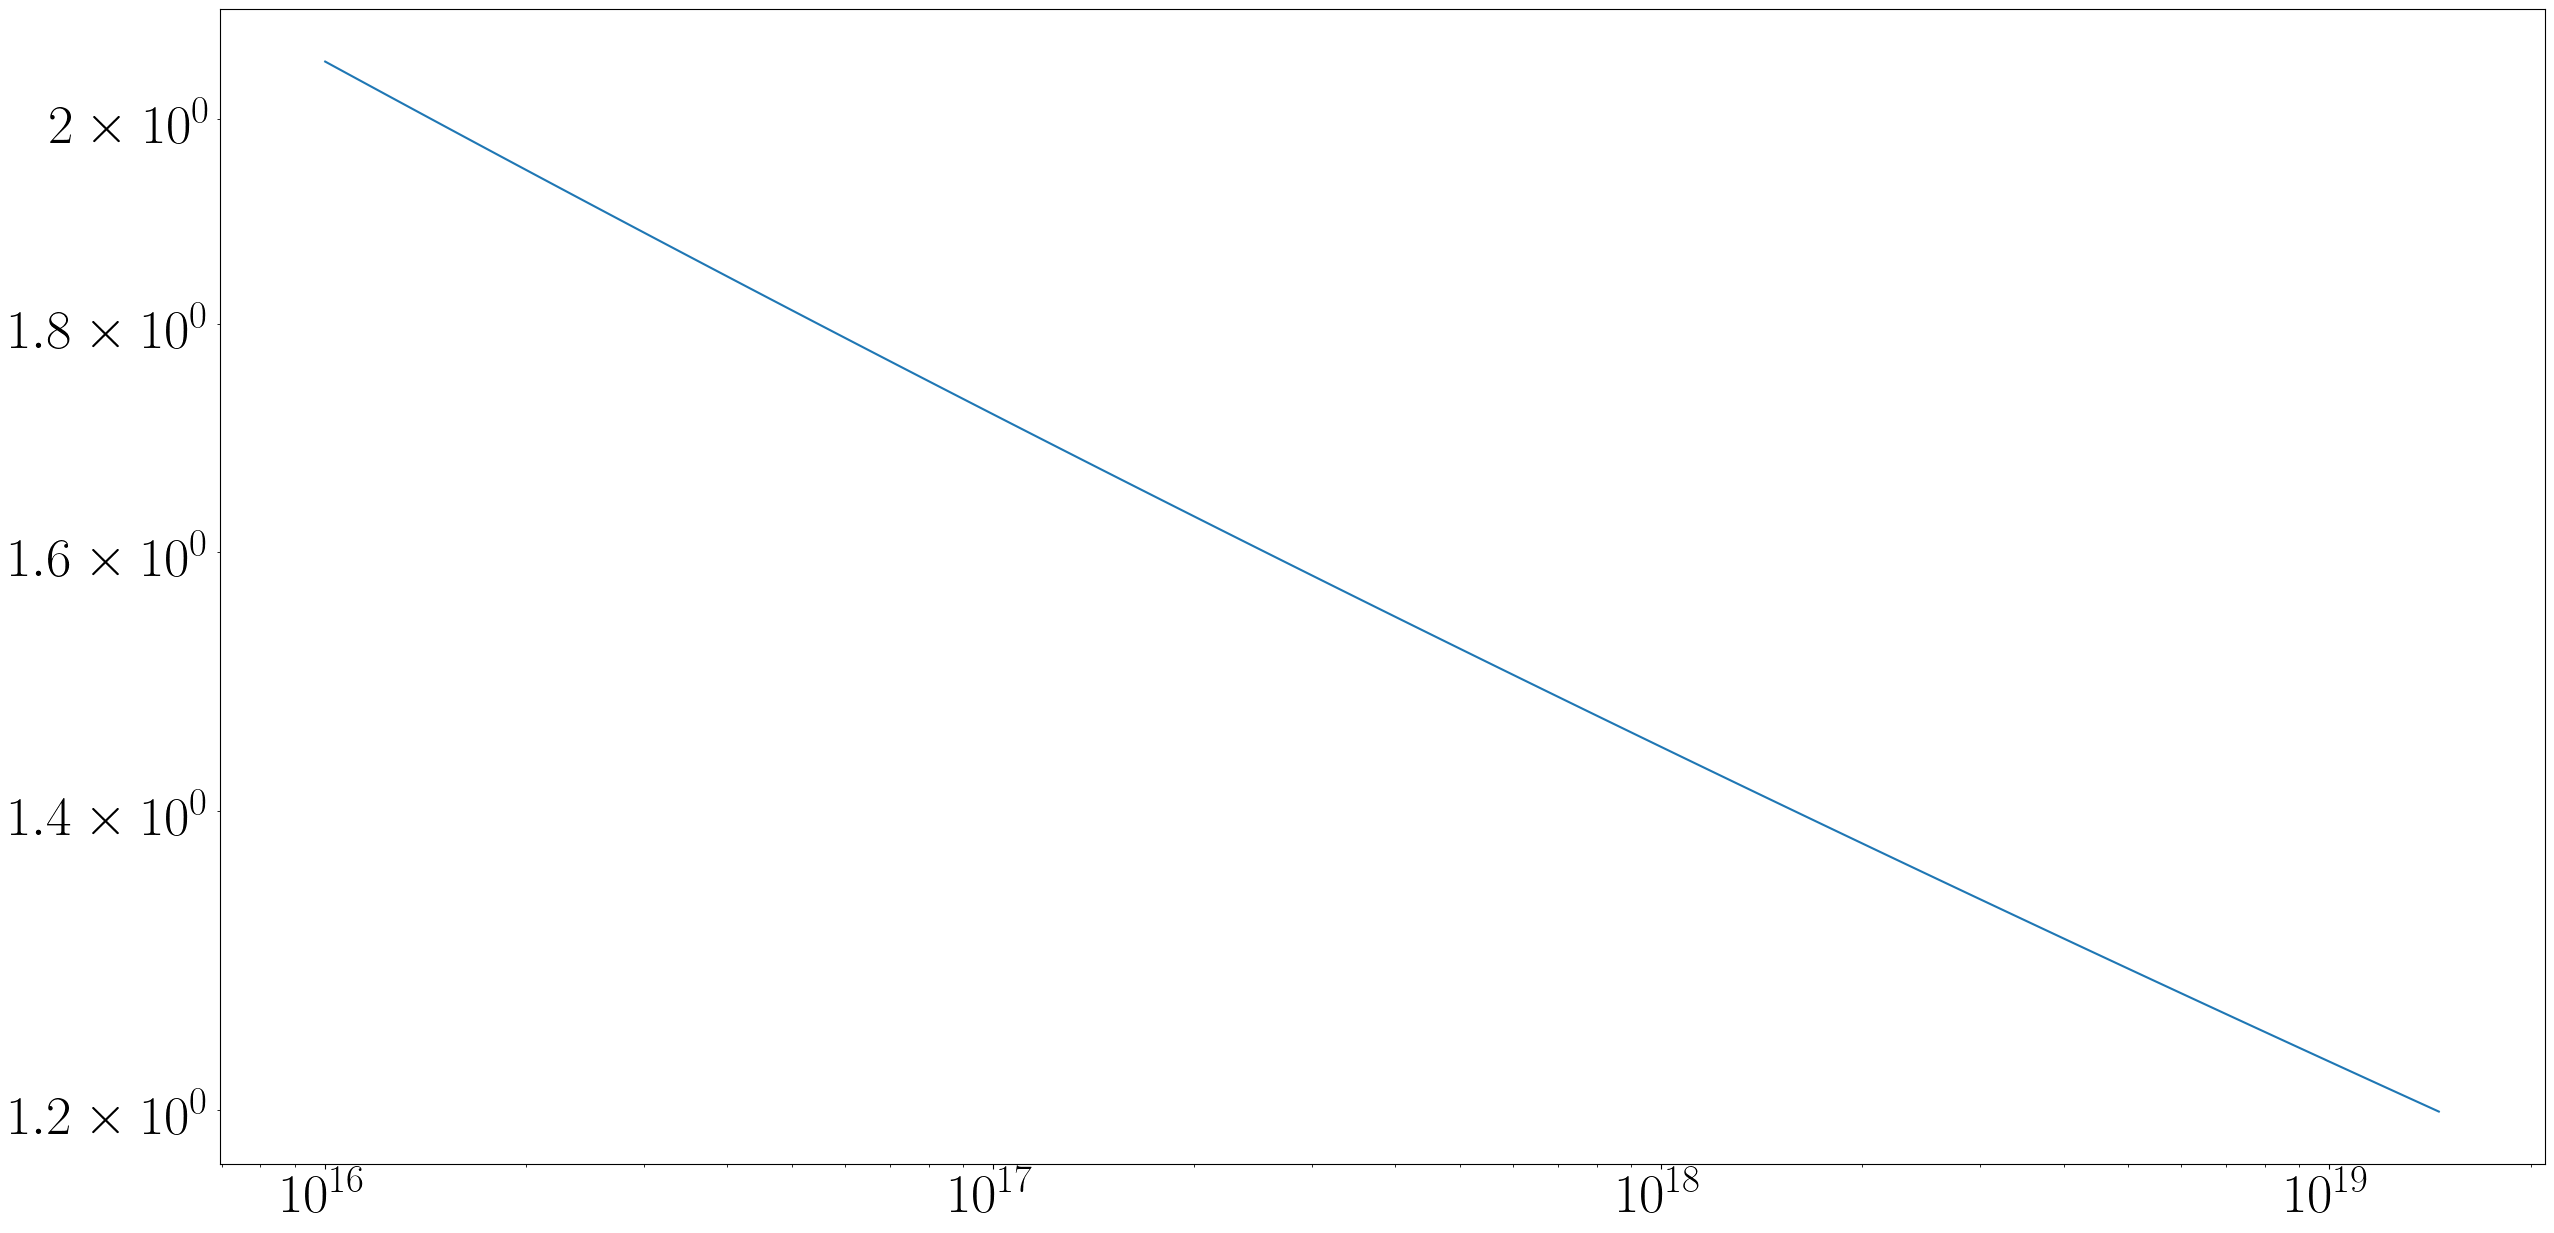

In [17]:
x = 0.5 * (bins[:1] + bins[:-1])

plt.plot(x, n[np.argmax(n)] / n * n * np.log10(x)**(-3))
plt.yscale("log")
plt.xscale("log")

In [18]:
print(n)

[ 273.  256.  245.  258.  271.  295.  328.  369.  332.  341.  399.  386.
  420.  457.  425.  506.  466.  514.  550.  526.  610.  587.  593.  653.
  608.  705.  745.  824.  758.  841.  783.  973.  855. 1019. 1045. 1011.
 1053. 1124. 1251. 1303. 1453. 1335. 1408. 1511. 1495. 1508. 1750. 1628.
 1814. 1931. 2043. 1954. 2005. 2232. 2092. 2155. 1973. 1718. 1641. 1795.
 1653. 1735. 1875. 1795. 2063. 1795. 2185. 2345. 2305. 2257. 2767. 3970.
 3938. 4221. 3758. 4120. 4249. 4523. 4564. 5030. 4797. 4928. 5370. 5745.
 5959. 5719. 5877. 6411. 6847. 7249. 6121. 6529. 6750. 6723. 7044. 7430.
 8439. 8425. 8142.]


In [22]:
np.savetxt("/cr/users/filip/Binaries/energy_histogram.csv", np.dstack([x, n])[0])

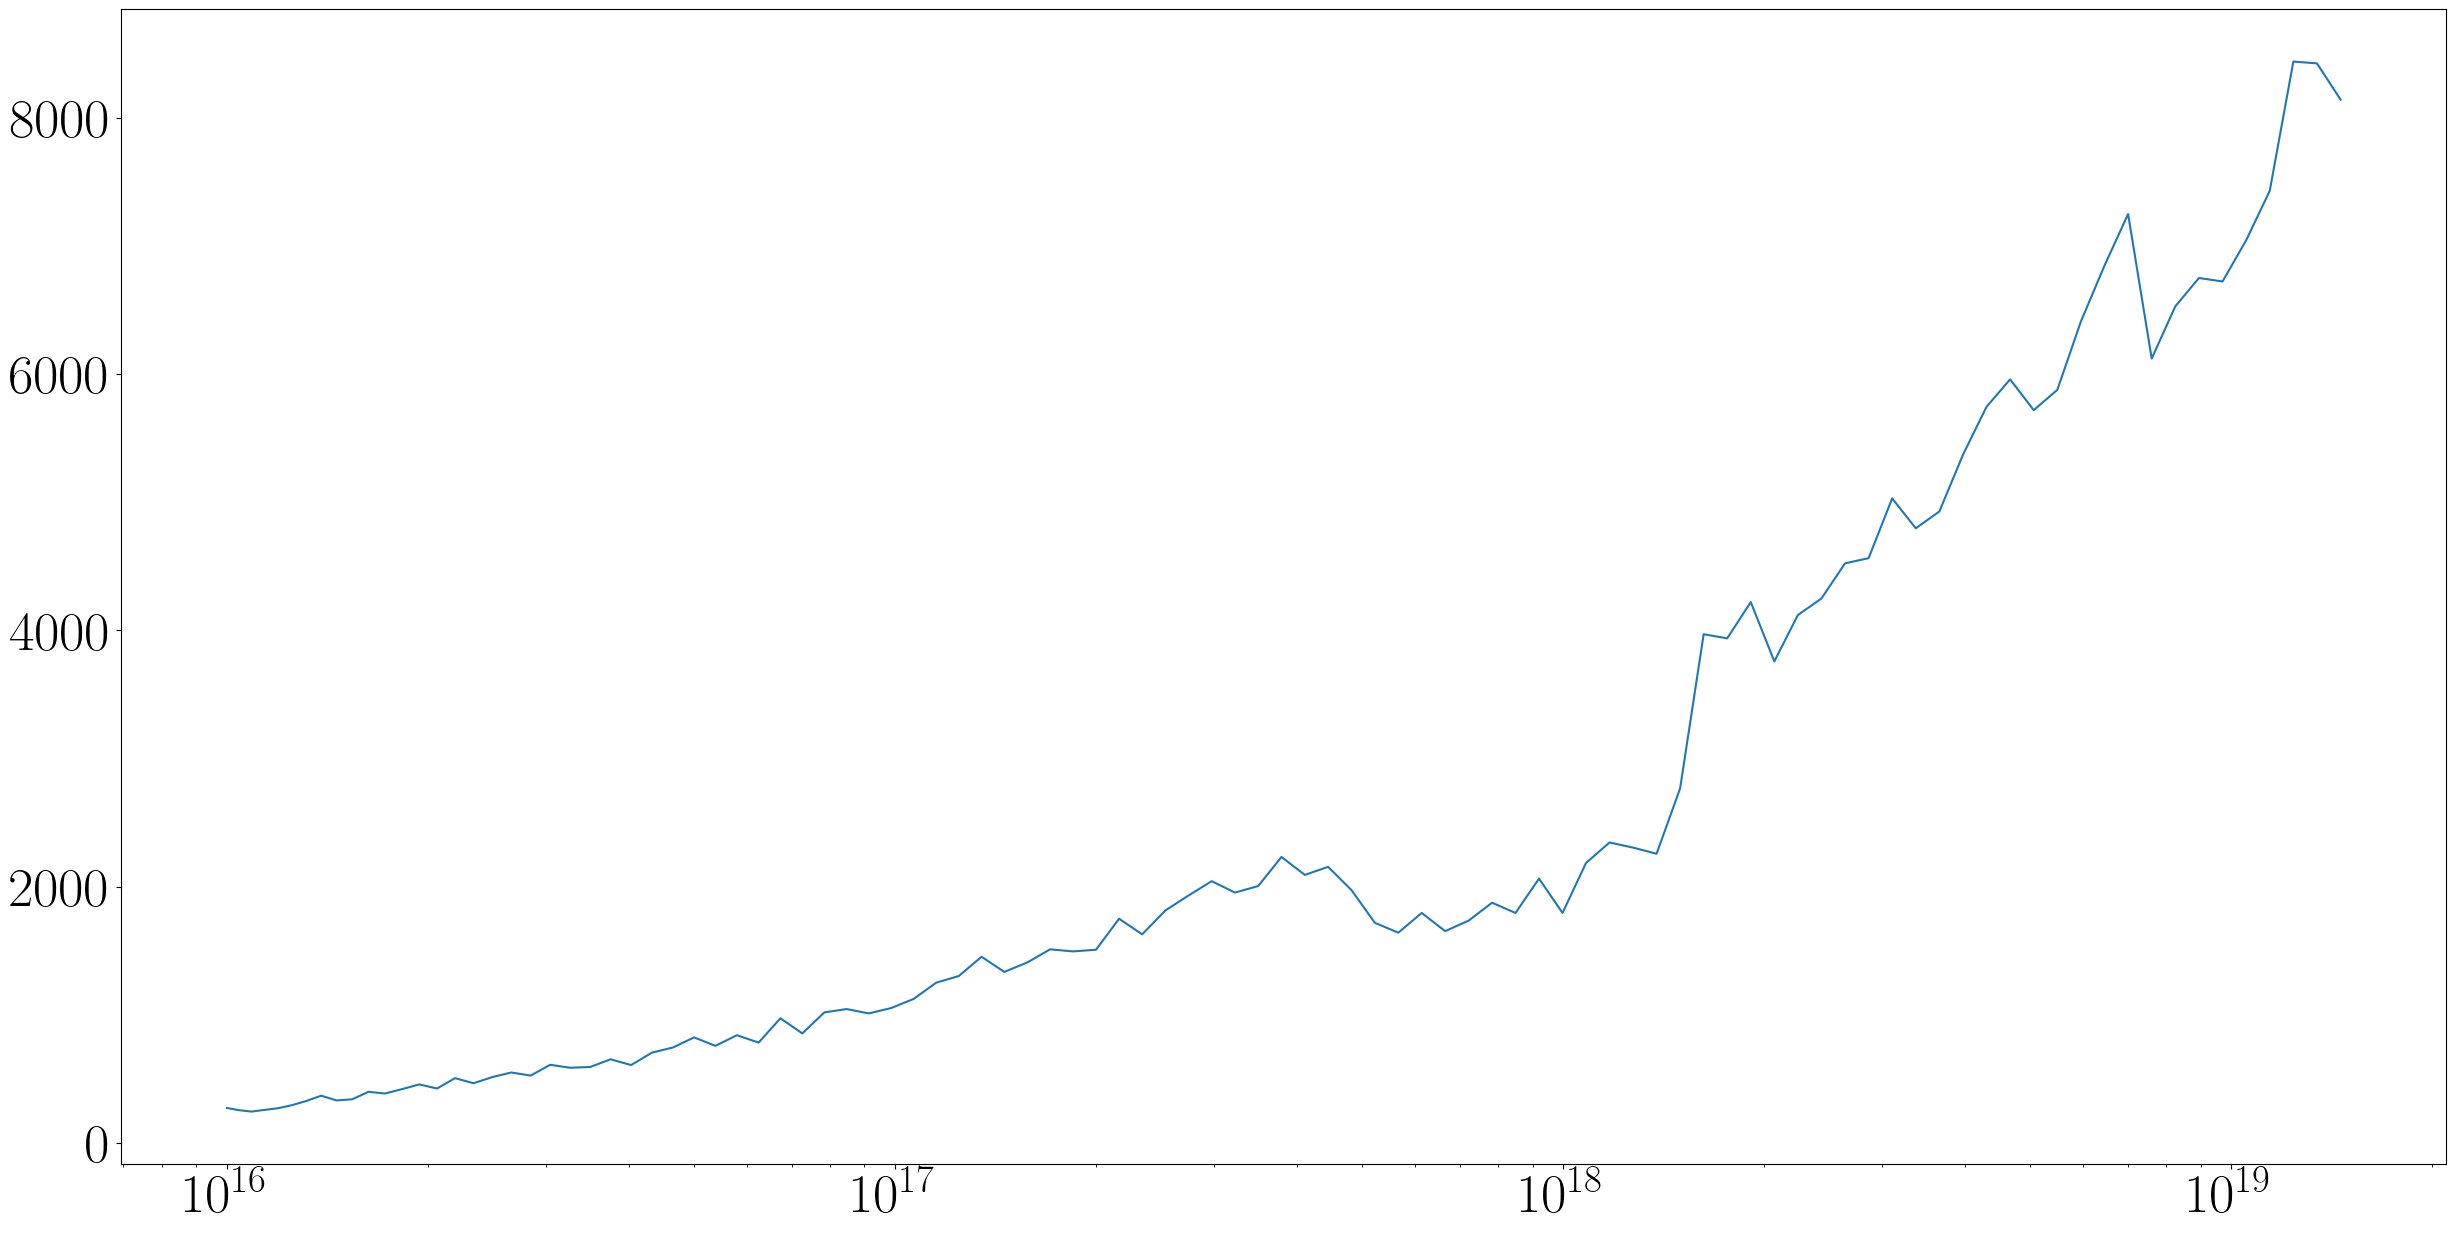

In [24]:
x, e = np.loadtxt("/cr/users/filip/Binaries/energy_histogram.csv", unpack = True)
plt.plot(x,e)
plt.xscale("log")

In [67]:
from Binaries import *

TP, _, _, FN = HardwareClassifier().load_and_print_performance("final_all_triggers")

# calculate trigger efficiency over predictions scaled by energy (flux)
def get_true_accuracy(self, TP : np.ndarray, FN : np.ndarray) -> float : 

    x, e = np.loadtxt("/cr/users/filip/Binaries/energy_histogram.csv", unpack = True)

    efficiency_scaled = 0
    old_efficiency = len(TP) / (len(TP) + len(FN))
    weights = 0

    # weight scaling: w = (E_ref / E_i) * (E_i^(-3) / E_ref^(-3) ===> E_ref * E_i^(-4)

    for n, prediction in enumerate(TP[:, 1], 1):
        
        idx = np.digitize(prediction, x) - 1
        weight = e[np.argmax(e)] / e[idx] # * e[idx]**(-4) / 10**16.5**(-4)
        efficiency_scaled += weight
        weights += weight

    print(weight)
    efficiency_scaled /= weights

    print(weights)

    return efficiency_scaled, old_efficiency

HardwareClassifier                            final_all_triggers                    89144       0       0  156908 -> ACC =  36.23%


In [68]:
a, b = get_true_accuracy(HardwareClassifier(), TP, FN)

print(a, b)

11.133245382585752
188854.17560991232
1.0 0.36229740054947734


In [69]:
Network = NNClassifier("ENSEMBLES/120_LSTM_3L_Downsampled_AllEnergies_NoCuts/ensemble_01", supress_print = True)
TP_, _, _, FN_ = Network.load_and_print_performance("validation_data")


a, b = get_true_accuracy(Network, TP_, FN_)
print(a,b)

ENSEMBLES/120_LSTM_3L_Downsampled_AllEne...   validation_data                       49503       0       0     569 -> ACC =  98.86%
1.7124594155844155
132285.45000472895
1.0 0.9886363636363636
